In [1]:
import os
import sys

currDir = os.getcwd()
parentDir = os.path.abspath(os.path.join(currDir, os.pardir))
sys.path.append(parentDir) # append parent path

# print(currDir)
# print(parentDir)

In [2]:
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
from utils.credentials import ESHINHW_ACCOUNT_TYPE, ESHINHW_QUESTRADE_API_CODE
from questradeAPI import Questrade

## Initialize QuestradeBot

In [3]:
USER_ID = 'eshinhw'
qbot = Questrade(USER_ID)

## Multiple Accounts Access

In [4]:
acctData = {}
acctNums = qbot.accounts
ACCOUNT_TYPE = ESHINHW_ACCOUNT_TYPE
for aNum in acctNums:
    if aNum in ACCOUNT_TYPE:
        aName = ACCOUNT_TYPE[aNum]        
        if aName == 'Stock Portfolio':
            stock_bal = qbot.account_balances(aNum)
            stock_portfolio = qbot.account_positions(aNum)
            print(stock_portfolio)
            stock_return = qbot.portfolio_return(aNum)
#             stock_dividends = qbot.get_dividend_income(aNum)
#         if aName == 'Quant Portfolio':
#             quant_bal = qbot.get_balance(aNum)
#             quant_portfolio = qbot.get_investment_summary(aNum)
#             quant_return = (quant_portfolio['Return (%)'].dot(quant_portfolio['Portfolio (%)'])) / 100
#             quant_dividends = qbot.get_dividend_income(aNum) 
    else:
        print("Please define portfolio first in credentials.py")

                                           Description Currency  Quantities  \
MMM                                         3M COMPANY      USD           3   
O                                   REALTY INCOME CORP      USD          75   
JPM                               JPMORGAN CHASE & CO.      USD           6   
VTI  VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...      USD           3   
QQQ                       INVESCO QQQ TRUST UNIT SER 1      USD           2   
TLT  ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...      USD           4   
IEF  ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...      USD           5   

     Market Value  Return (%)  Portfolio (%)  
MMM        547.20       -7.35           5.63  
O         5540.25       20.70          56.98  
JPM       1025.64       11.39          10.55  
VTI        707.40       20.50           7.28  
QQQ        755.86       18.22           7.77  
TLT        575.64       -5.12           5.92  
IEF        570.50       -3.83         

## US Stock Investing

### Stock Portfolio Balance

In [5]:
stock_bal

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.336500,0.00,31785.336500,100.0,0.0
USD,12886.723943,9722.49,22609.213943,57.0,43.0


### Stock Portfolio

In [6]:
stock_portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,547.20,-7.35,5.63
O,REALTY INCOME CORP,USD,75,5540.25,20.70,56.98
JPM,JPMORGAN CHASE & CO.,USD,6,1025.64,11.39,10.55
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,707.40,20.50,7.28
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,755.86,18.22,7.77
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,575.64,-5.12,5.92
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,570.50,-3.83,5.87


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

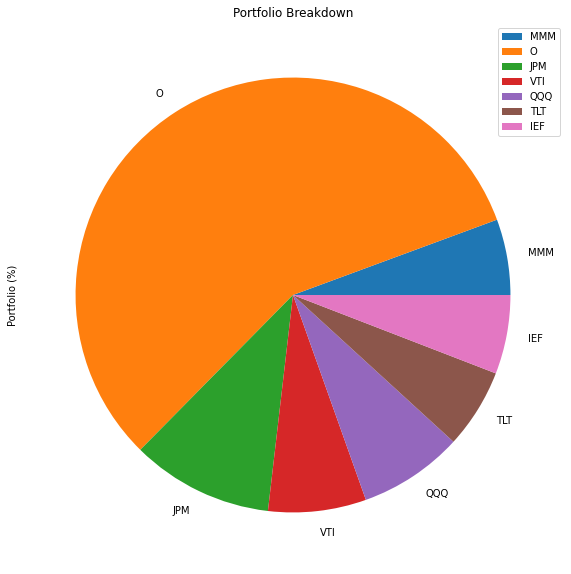

In [7]:
stock_portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

### Stock Portfolio Return

In [8]:
stock_return

14.962868999999996

### Stock Dividends

In [ ]:
stock_dividends.loc['Total'] = stock_dividends.sum(numeric_only=True, axis=0)
stock_dividends.tail()

## TAA Quantitative Investing

### Quant Balance

In [ ]:
quant_bal

### Quant Portfolio

In [ ]:
quant_portfolio

In [ ]:
quant_portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

### Quant Portfolio Return

In [ ]:
quant_return

### Quant Dividends

In [ ]:
quant_dividends.loc['Total'] = quant_dividends.sum(numeric_only=True, axis=0)
quant_dividends.tail()

In [ ]:
quant_dividends[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))